In [1]:
import yfinance as yf     #importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

# Importing data and analysing it

In [2]:
stock= 'COST'
startDate= '2020-10-27'
endDate= '2021-10-27'

initialData=  yf.download(f'''{stock} ^VIX''', start=f'''{startDate}''', end=f'''{endDate}''') # importing the stock & vix data from yahoo

[*********************100%***********************]  2 of 2 completed


In [3]:
initialData.head()

Adj Close                  Close                   High  \
                  COST       ^VIX        COST       ^VIX        COST   
Date                                                                   
2020-10-27  359.764404  33.349998  372.720001  33.349998  374.910004   
2020-10-28  352.274109  40.279999  364.959991  40.279999  372.410004   
2020-10-29  352.854401  37.590000  364.859985  37.590000  369.089996   
2020-10-30  345.852600  38.020000  357.619995  38.020000  363.850006   
2020-11-02  352.399872  37.130001  364.390015  37.130001  365.660004   

                              Low                   Open              Volume  \
                 ^VIX        COST       ^VIX        COST       ^VIX     COST   
Date                                                                           
2020-10-27  33.770000  368.769989  31.850000  368.769989  32.040001  1525400   
2020-10-28  40.770000  364.670013  34.680000  367.329987  34.689999  1908300   
2020-10-29  41.160000  362.510010  35.630001  363.230011  38.799999  1838500   
2020-10-30  41.090000  355.790009  36.500000  361.130005  40.810001  2724100   
2020-11-02  38.779999  360.709991  36.130001  362.220001  38.570000  1646300   

                 
           ^VIX  
Date             
2020-10-27    0  
2020-10-28    0  
2020-10-29    0  
2020-10-30    0  
2020-11-02    0

In [4]:
initialData.tail()

Adj Close              Close               High             \
                  COST   ^VIX        COST   ^VIX        COST       ^VIX   
Date                                                                      
2021-10-20  469.011230  15.49  469.769989  15.49  472.500000  15.890000   
2021-10-21  476.459198  15.01  477.230011  15.01  477.649994  16.110001   
2021-10-22  481.211487  15.43  481.989990  15.43  485.029999  16.389999   
2021-10-25  489.308411  15.24  490.100006  15.24  492.209991  16.330000   
2021-10-26  484.745789  15.98  485.529999  15.98  488.250000  16.709999   

                   Low               Open              Volume       
                  COST   ^VIX        COST       ^VIX     COST ^VIX  
Date                                                                
2021-10-20  467.839996  15.29  468.519989  15.820000  1352900    0  
2021-10-21  469.079987  14.92  469.769989  16.059999  1423300    0  
2021-10-22  478.570007  14.84  478.989990  15.350000  1710300    0  
2021-10-25  479.500000  15.10  481.989990  16.139999  1903400    0  
2021-10-26  481.230011  14.90  482.130005  15.020000  2378600    0

In [5]:
initialData['Adj Close'].head()

,COST,^VIX
Date,,
2020-10-27,359.764404,33.349998
2020-10-28,352.274109,40.279999
2020-10-29,352.854401,37.590000
2020-10-30,345.852600,38.020000
2020-11-02,352.399872,37.130001


In [6]:
initialData['Adj Close'].tail()

,COST,^VIX
Date,,
2021-10-20,469.011230,15.49
2021-10-21,476.459198,15.01
2021-10-22,481.211487,15.43
2021-10-25,489.308411,15.24
2021-10-26,484.745789,15.98


In [7]:
data= initialData['Adj Close']
sData= data[f'''{stock}''']
vix= data['^VIX']
sData.head()

Date
2020-10-27    359.764404
2020-10-28    352.274109
2020-10-29    352.854401
2020-10-30    345.852600
2020-11-02    352.399872
Name: COST, dtype: float64

In [8]:
vix.head()

Date
2020-10-27    33.349998
2020-10-28    40.279999
2020-10-29    37.590000
2020-10-30    38.020000
2020-11-02    37.130001
Name: ^VIX, dtype: float64

### Plotting the movement of Stock and ^VIX

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

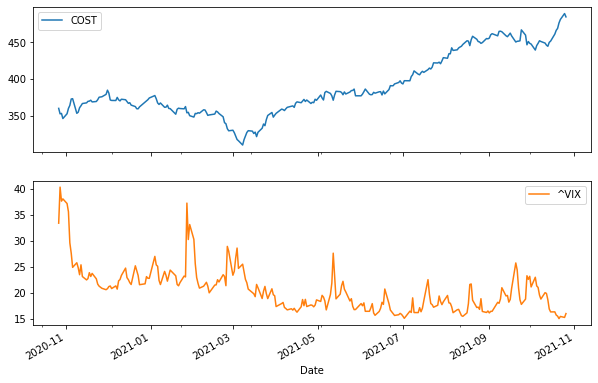

In [9]:
data.plot(figsize= (10, 6.5),subplots= True)

#### Summary Statistics

In [10]:
data.describe().round(2)

,COST,^VIX
count,252.00,252.00
mean,389.01,20.58
std,42.21,4.35
min,309.67,15.01
25%,359.59,17.32
50%,375.30,19.80
75%,423.29,22.56
max,489.31,40.28


#### Statistics changes over  time

In [11]:
data.diff().describe().round(2)

,COST,^VIX
count,251.00,251.00
mean,0.50,-0.07
std,4.33,1.99
min,-19.98,-7.00
25%,-2.13,-0.99
50%,0.62,-0.26
75%,3.09,0.74
max,14.95,14.19


#### Rolling statstics

In [12]:
sym = stock
stock_data = pd.DataFrame(data[sym]).dropna()
stock_data.tail() 

,COST
Date,
2021-10-20,469.011230
2021-10-21,476.459198
2021-10-22,481.211487
2021-10-25,489.308411
2021-10-26,484.745789


In [13]:
window = 10
stock_data['min'] = data[sym].rolling(window=window).min()
stock_data['mean'] = data[sym].rolling(window=window).mean()
stock_data['std'] = data[sym].rolling(window=window).std()
stock_data['median'] = data[sym].rolling(window=window).median()
stock_data['max'] = data[sym].rolling(window=window).max()
stock_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
stock_data.dropna().head()

,COST,min,mean,std,median,max,ewma
Date,,,,,,,
2020-11-09,352.989807,345.852600,358.517236,9.044083,356.355286,372.970001,357.797753
2020-11-10,354.556458,345.852600,357.996442,9.113963,353.773132,372.970001,355.366781
2020-11-11,360.649231,345.852600,358.833954,8.912269,357.138611,372.970001,359.328619
2020-11-12,363.347382,345.852600,359.883252,8.746190,360.184998,372.970001,362.342691
2020-11-13,366.374390,352.399872,361.935431,7.390864,361.998306,372.970001,365.366465


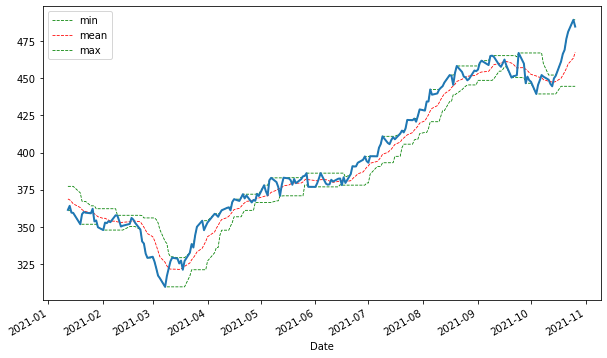

In [14]:
ax = stock_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

#### Calculating Simple Moving Average

In [15]:
stock_data['SMA1'] = data[sym].rolling(window=20).mean()
stock_data['SMA2'] = data[sym].rolling(window=60).mean()
stock_data[[sym, 'SMA1', 'SMA2']].tail()

,COST,SMA1,SMA2
Date,,,
2021-10-20,469.011230,452.371661,450.415493
2021-10-21,476.459198,453.592188,451.343992
2021-10-22,481.211487,454.303036,452.287631
2021-10-25,489.308411,455.777650,453.292339
2021-10-26,484.745789,457.683566,454.234315


<AxesSubplot:xlabel='Date'>

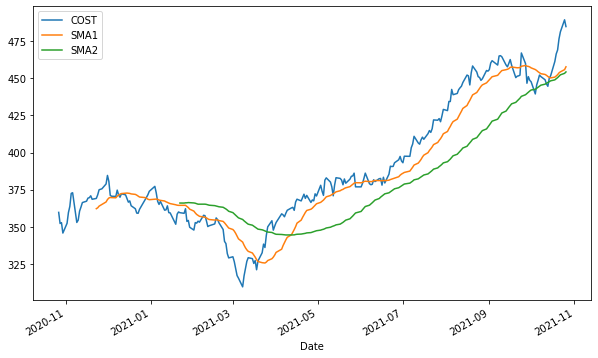

In [16]:
stock_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

### Correlation Analysis

In [17]:
Corr_data = data[[stock ,'^VIX']].dropna()
Corr_data.tail()

,COST,^VIX
Date,,
2021-10-20,469.011230,15.49
2021-10-21,476.459198,15.01
2021-10-22,481.211487,15.43
2021-10-25,489.308411,15.24
2021-10-26,484.745789,15.98


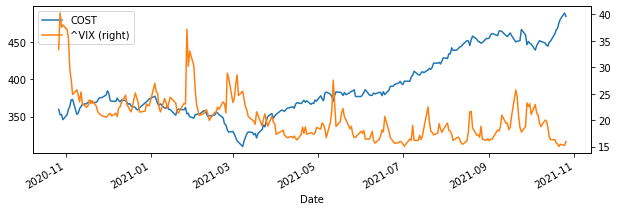

In [18]:
Corr_data.loc[startDate:].plot(secondary_y='^VIX', figsize=(10, 3));

#### Logarithmic Returns

In [19]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,COST,^VIX
Date,,
2020-10-27,NaN,NaN
2020-10-28,-0.021040,0.188797
2020-10-29,0.001646,-0.069117
2020-10-30,-0.020043,0.011374
2020-11-02,0.018754,-0.023687


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

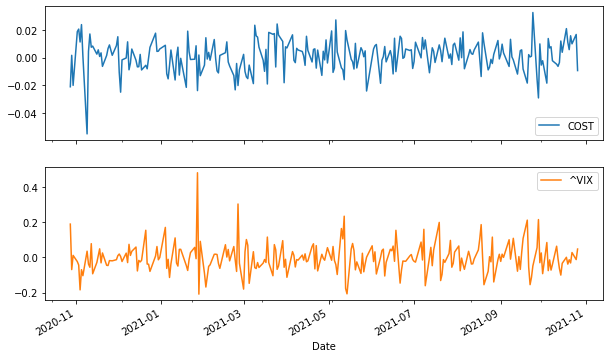

In [20]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='COST', ylabel='COST'>,
        <AxesSubplot:xlabel='^VIX', ylabel='COST'>],
       [<AxesSubplot:xlabel='COST', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

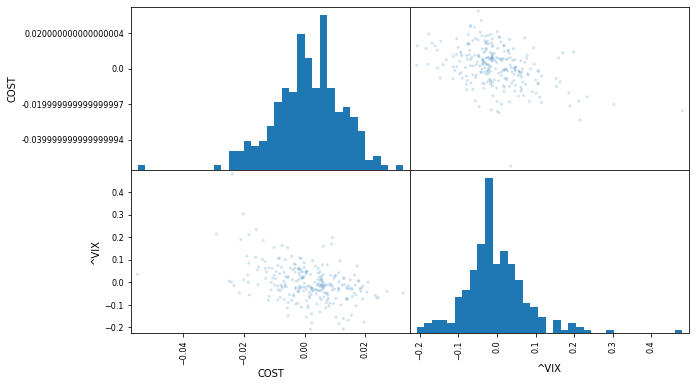

In [21]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

### OLS Regression

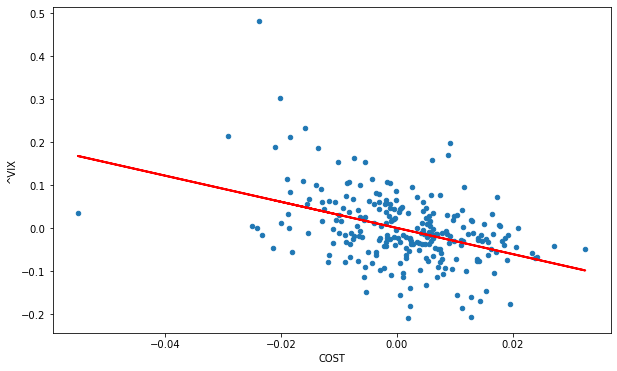

In [22]:
reg = np.polyfit(sprets[stock], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x=stock, y='^VIX', figsize=(10, 6))
ax.plot(sprets[stock], np.polyval(reg, sprets[stock]), 'r', lw=2);

### Calculating the historic & market volatility

#### Historic volatility

In [23]:
logReturn= np.log(sData/sData.shift(1))

In [24]:
hstVol= np.sqrt(252) *logReturn.std()
print('The annualised volatility is', round(hstVol *100,2), '%' )

The annualised volatility is 17.88 %


#### Market volatility

In [25]:
vixVol= vix[-1]
print('Market volatility is', round(vixVol ,2), '%')

Market volatility is 15.98 %


# Pricing our European Option

### Defining the variables for the models

In [26]:
ttm= 1                 #Select your time to maturity
rfr= 0.0168              #Seect your risk free rate
N= 5                     #Select number of period for binomial tree
smp= 10000               #Select number of times to simulate for MonteCarlo sim 
div= 0.006               #selecting your dividend 
opt= 'call'              #Select your type of contract call or put
stk= 479.25                #select your strike price
#-------------------# Auto variables
sig= hstVol              #Select a volitility to choose from historic or marke
spt= sData[-1]           #Spot price last days adjusted close

In [27]:
print ('Your variables are as follows \nSpot price ', round(spt, 2))

Your variables are as follows 
Spot price  484.75


# Binomial tree Simulation

In [28]:
dT = float(ttm) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [29]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = spt
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [30]:
S

array([[484.74578857, 525.10474734, 568.82391179, 616.18304589,
        667.48520617, 723.05868108],
       [  0.        , 447.48877387, 484.74578857, 525.10474734,
        568.82391179, 616.18304589],
       [  0.        ,   0.        , 413.0952913 , 447.48877387,
        484.74578857, 525.10474734],
       [  0.        ,   0.        ,   0.        , 381.34525302,
        413.0952913 , 447.48877387],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        352.03548688, 381.34525302],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 324.97843632]])

In [31]:
a = np.exp(rfr * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5010373274377455

#### Finding option value at end of node

In [32]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if opt =="call":
    V[:,-1] = np.maximum(S_T-stk, 0.0)
elif opt =="put":
    V[:,-1] = np.maximum(stk-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 243.80868108],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 136.93304589],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  45.85474734],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

#### Find option value at earlier nodes

In [33]:
# European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-rfr*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 42.86059636,  66.04198308,  98.28640955, 140.14280901,
        189.84278393, 243.80868108],
       [  0.        ,  19.87193033,  34.1089591 ,  56.91894483,
         91.18148955, 136.93304589],
       [  0.        ,   0.        ,   5.70974697,  11.43420595,
         22.8978738 ,  45.85474734],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [34]:
btm =V[0,0]
print('Your European ' + opt, round(btm ,2))

Your European call 42.86


# Monte Carlo Simulation

In [35]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = ttm / M 
    S = np.zeros((M + 1, I))
    S[0] = spt 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((rfr - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S

In [36]:
S = mcs_simulation_np(smp)
print("Simulating MoteCarlo model with", smp, "sample size")

Simulating MoteCarlo model with 10000 sample size


In [37]:
S = np.transpose(S)
S

array([[484.74578857, 483.16204803, 481.71139887, ..., 401.47674105,
        401.14401907, 400.95252667],
       [484.74578857, 484.93616715, 483.96816107, ..., 660.52016362,
        660.04306707, 660.89305572],
       [484.74578857, 483.57890773, 482.48633567, ..., 730.09443596,
        726.98153553, 725.72326188],
       ...,
       [484.74578857, 484.26094589, 484.54877154, ..., 545.3793162 ,
        546.32566444, 545.79454799],
       [484.74578857, 483.94720063, 485.25025892, ..., 623.80893618,
        621.52735654, 622.62854089],
       [484.74578857, 485.45386781, 485.84148026, ..., 571.88468078,
        573.42019925, 573.43518793]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

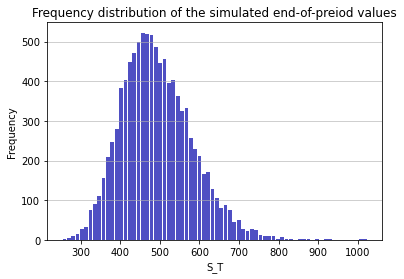

In [38]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [39]:
# European Option
if opt =="call":
    msc = np.mean(np.maximum(S[:,-1] - stk,0))
    print('Your European call', round(msc ,2))
elif opt =="put":
    msc = np.mean(np.maximum(stk - S[:,-1],0))   
    print('Your European put', round(msc ,2))

Your European call 41.92


### Avrage of both models

In [40]:
avgVal= (btm +msc)/ 2
print('The avrage & fair price of the ',opt,'option should be ', round(avgVal ,2))

The avrage & fair price of the  call option should be  42.39


# Greeks

## Delta 

In [41]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [42]:
S = np.linspace(spt /2, spt *1.7, 75)
T = np.linspace(0.1, 2, 75)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], stk, T[i], rfr, div, sig, opt)

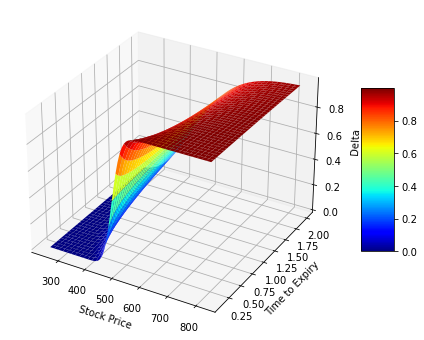

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.jet, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [44]:
dval =delta(spt, stk, ttm, rfr, div, sig, opt)
print('Delta Value =', round(dval ,2))

Delta Value = 0.58


## Gamma

In [45]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [46]:
S = np.linspace(spt /1.3, spt *1.2, 75)
T = np.linspace(0.1, 2, 75)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], stk, T[i], rfr, div, sig, opt)

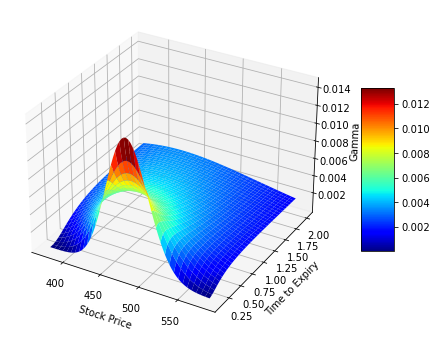

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.jet, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [48]:
gval =gamma(spt, stk, ttm, rfr, div, sig, opt)
print('Theta Value =', round(gval ,4))

Theta Value = 0.0044


## Theta

In [49]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = -(vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T))) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -(vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T))) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [50]:
S = np.linspace(spt /1.3, spt *1.3, 75)
T = np.linspace(0.1, 2, 75)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], stk, T[i], rfr, div, sig, opt)

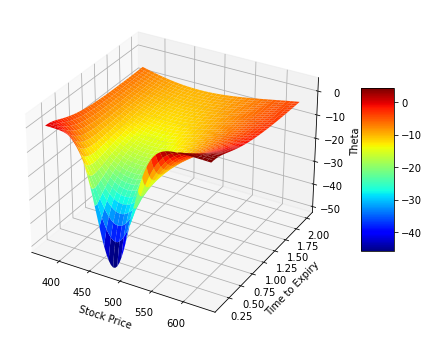

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.jet, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
tval =theta(spt, stk, ttm, rfr, div, sig, opt)
print('Theta Value =', round(tval ,2))

Theta Value = -14.42


## Roh

In [53]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [54]:
S = np.linspace(spt /10, spt *2, 75)
T = np.linspace(0.1, 2, 75)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], stk, T[i], rfr, div, sig, opt)

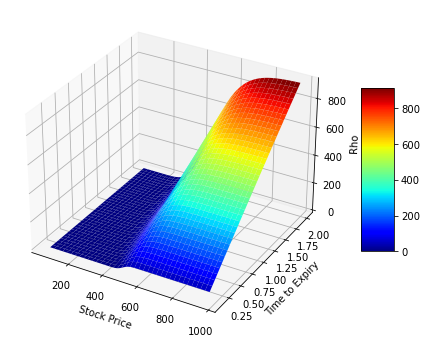

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.jet, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho  ')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [56]:
rval =rho(spt, stk, ttm, rfr, div, sig, opt)
print('Rho Value =', round(rval ,2))

Rho Value = 242.16


## Vega

In [57]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [58]:
S = np.linspace(spt /10, spt *2, 75)
T = np.linspace(0.1, 2, 75)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], stk, T[i], rfr, div, sig, opt)

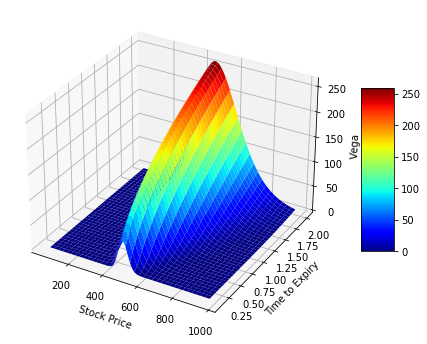

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.jet, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega   ')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [60]:
vval =vega(spt, stk, ttm, rfr, div, sig, opt)
print('Vega Value =', round(vval ,2))

Vega Value = 187.89


# Conclution 

In [61]:
print('The fair Price for the',stock,'European',opt,'Option is $',round(avgVal ,2),'.')
print('The Greeks are as follows \n Delta=',round(dval ,4),'\n Gama=',round(gval ,4),'\n Theta=',round(tval ,2),'\n Rho=',round(rval ,2),'\n Vega=',round(vval ,2))

The fair Price for the COST European call Option is $ 42.39 .
The Greeks are as follows 
 Delta= 0.5811 
 Gama= 0.0044 
 Theta= -14.42 
 Rho= 242.16 
 Vega= 187.89
